In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score,
    f1_score,
    classification_report,
    roc_auc_score,
)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#  Load the data from csv fole to Pandas Dataframe
snapp_data = pd.read_csv('/content/drive/MyDrive/data/snapp_data_clean.csv')

In [ ]:
# printing the first 5 rows of the Dataframe
snapp_data.head()

,source,destination,latitude,longitude,service_type,datetime,hour,day,month,part_of_day,peak_hour,route,route_day_count,mean_hour_by_source,service_type_day_count,weekday,service_type_weekday_count
0,District7,Poonak Azad University,35.729,51.482,Sharing,2025-02-27 01:06:03,1,27,2,night,0,District7->Poonak Azad University,223,11.571418,864,3,7302
1,District20,Poonak Azad University,35.600,51.420,Eco,2024-09-29 14:06:02,14,29,9,noon,0,District20->Poonak Azad University,313,11.663164,2409,6,15302
2,District15,Poonak Azad University,35.639,51.499,Eco,2024-10-07 02:28:40,2,7,10,night,0,District15->Poonak Azad University,130,11.556827,1055,0,14962
3,District11,Poonak Azad University,35.676,51.421,Eco Plus,2024-10-23 01:20:00,1,23,10,night,0,District11->Poonak Azad University,551,11.542119,5653,2,42300
4,District8,Poonak Azad University,35.733,51.561,Eco Plus,2024-10-15 20:47:07,20,15,10,night,0,District8->Poonak Azad University,571,11.492052,5891,1,21643


In [ ]:
# ## Preprocessing function

def preprocess_data(df, numeric_col, categorical_col):

  numeric_transformer = Pipeline([
      ('imputer', SimpleImputer(strategy='median')),
      ('scaler', StandardScaler())
  ])

  categorical_transformer = Pipeline([
      ('imputer', SimpleImputer(strategy='most_frequent')),
      ('onehot', OneHotEncoder(handle_unknown='ignore'))
  ])

  preprocessor = ColumnTransformer([
      ('num', numeric_transformer, numeric_col),
      ('cat', categorical_transformer, categorical_col)
  ])

  return preprocessor

In [ ]:
# ## Regression Model

def regression_model(df, target='route_day_count'):
  X = snapp_data.drop(columns=[target, 'datetime', 'destination', 'route'], errors = 'ignore')
  y = snapp_data[target]
  num_col = X.select_dtypes(include=[np.number]).columns.tolist()
  cat_col= [c for c in X.columns if c not in num_col]

  preproc = preprocess_data(df, num_col, cat_col)
  model = RandomForestRegressor(n_estimators=300, random_state=42)
  pipe = Pipeline([
      ('preproc', preproc),
      ('model', model)
  ])

  X_train, X_test, y_train, y_test = train_test_split(
      X,
      y,
      test_size=0.2,
      random_state=42
  )

  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)

  print("\n Regression Results")
  print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
  print(f"RMSE: {mean_squared_error(y_test, y_pred):.3f}")
  print(f"R2: {r2_score(y_test, y_pred):.3f}")
  return pipe

In [ ]:
reg_model = regression_model(snapp_data, "route_day_count")


🔹 Regression Results
MAE: 0.006
RMSE: 0.016
R2: 1.000


In [ ]:
# Check overfiting

X = snapp_data.drop(columns=['route_day_count', 'datetime', 'destination', 'route'], errors = 'ignore')
y = snapp_data['route_day_count']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

train_preds = reg_model.predict(X_train)
test_preds = reg_model.predict(X_test)

mae_train = mean_absolute_error(y_train, train_preds)
rmse_train =  mean_squared_error(y_train, train_preds)
r2_train =  r2_score(y_train, train_preds)

mae_test = mean_absolute_error(y_test, test_preds)
rmse_test =  mean_squared_error(y_test, test_preds)
r2_test =  r2_score(y_test, test_preds)

print('\n Train vs Test Performance')
print('-----------------------------------')
print(f"Train -- MAE: {mae_train:.3f} | RMSE: {rmse_train:.3f} | R²: {r2_train:.3f}")
print(f"Test  --> MAE: {mae_test:.3f} | RMSE: {rmse_test:.3f} | R²: {r2_test:.3f}")


 Train vs Test Performance
-----------------------------------
Train -- MAE: 0.002 | RMSE: 0.003 | R²: 1.000
Test  --> MAE: 0.006 | RMSE: 0.016 | R²: 1.000


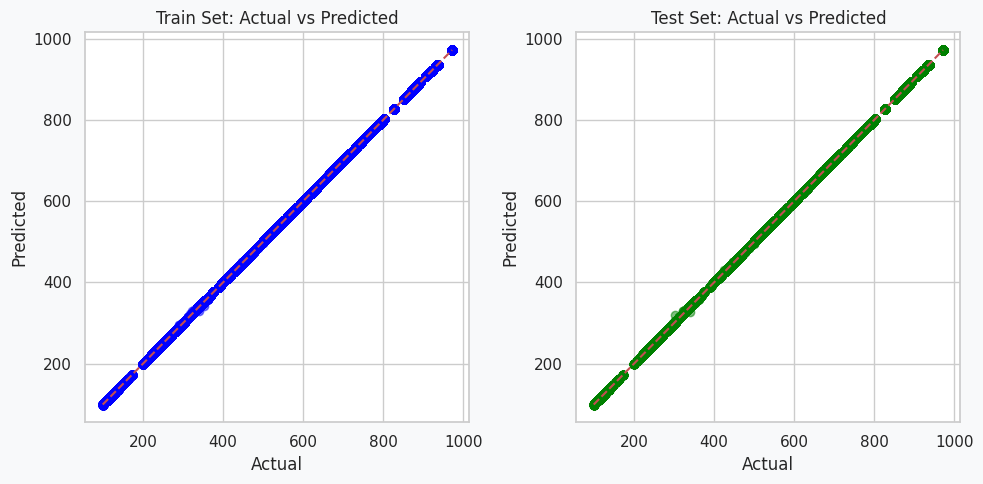

In [ ]:

train_preds = reg_model.predict(X_train)
test_preds  = reg_model.predict(X_test)

# train
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(y_train, train_preds, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Train Set: Actual vs Predicted")

# test
plt.subplot(1,2,2)
plt.scatter(y_test, test_preds, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Test Set: Actual vs Predicted")

plt.tight_layout()
plt.show()


In [ ]:
# Classification

def classification_model(df, target='service_type'):
  X = snapp_data.drop(columns=[target, 'datetime', 'destination', 'route'], errors = 'ignore')
  y = snapp_data[target]
  num_col = X.select_dtypes(include=[np.number]).columns.tolist()
  cat_col= [c for c in X.columns if c not in num_col]

  preproc = preprocess_data(df, num_col, cat_col)
  model = RandomForestClassifier(n_estimators=300, random_state=42)
  pipe = Pipeline([
      ('preproc', preproc),
      ('model', model)
  ])

  X_train, X_test, y_train, y_test = train_test_split(
      X,
      y,
      test_size=0.2,
      random_state=42
  )

  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)

  print("\n Classification Results")
  print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
  print(f"F1 (weighted): {f1_score(y_test, y_pred, average='weighted'):.3f}")
  print("\nClassification Report:\n", classification_report(y_test, y_pred))
  return pipe

In [ ]:
class_model = classification_model(snapp_data,'service_type')


 Classification Results
Accuracy: 1.000
F1 (weighted): 1.000

Classification Report:
               precision    recall  f1-score   support

         Eco       1.00      1.00      1.00     20400
    Eco Plus       1.00      1.00      1.00     30824
     Sharing       1.00      1.00      1.00     10258

    accuracy                           1.00     61482
   macro avg       1.00      1.00      1.00     61482
weighted avg       1.00      1.00      1.00     61482

